# Hockey Reference to dataframe

Inspiration: https://github.com/jldbc/pybaseball

Sample table: https://www.hockey-reference.com/leagues/NHL_2019_standings.html

This notebook shows how to scrape data from [hockey reference](https://www.hockey-reference.com) and pull it into a `pandas` dataframe. This automates the task of loading a table, downloading as a CSV and copying it into a  notebook directory. The table used in this example contains team vs team records from hockey-reference for a given season. I use it to create a heatmap based on point totals (using standard NHL scoring) for each matchup. This is a bit of a toy example but I like that I can relatively easily get a tangible output from my scraping. Future additions could include using the heatmap in a dashboard to track matchups for a set of teams, and also building out the data scraping as a Python library that works for a variety of tables and sources (`pybaseball` library is my inspiration for this). 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_soup(year):
    url = f'https://www.hockey-reference.com/leagues/NHL_{year}_standings.html'
    s=requests.get(url).content
    return BeautifulSoup(s, "lxml")

def get_team_vs_team_table(season):
    soup = get_soup(season)
    datasets = []
    tables = soup.find_all('table')
    table = soup.find('table', id="team_vs_team")
    data = []
    headings = [th.get_text() for th in table.find("tr").find_all("th")]
    data.append(headings[1:]) # drop Rank
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)

    df = pd.DataFrame(data)
    return df

In [2]:
df = get_team_vs_team_table(2019)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.set_index('')
df

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,VEG,WPG,WSH
,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,,2-1-2,0-2-0,0-2-0,1-1-0,2-0-0,2-2-0,1-2-0,2-0-1,1-2-0,...,0-2-0,1-1-0,2-1-1,1-2-0,1-0-1,0-1-1,3-1-0,0-4-0,0-2-1,2-0-0
Arizona Coyotes,3-2-0,,0-2-0,0-2-0,1-1-0,1-1-0,1-3-0,2-1-0,1-1-1,1-2-0,...,0-1-1,0-1-1,2-1-1,2-1-0,1-1-0,2-0-0,4-0-0,2-1-1,1-2-0,1-1-0
Boston Bruins,2-0-0,2-0-0,,3-1-0,2-1-0,2-1-0,1-1-0,2-0-0,1-1-0,1-0-1,...,1-1-1,1-2-0,2-0-0,1-0-1,1-3-0,3-1-0,0-1-1,2-0-0,0-1-1,1-2-0
Buffalo Sabres,2-0-0,2-0-0,1-2-1,,0-2-1,1-1-1,1-0-1,0-1-1,0-2-0,0-2-0,...,1-2-0,2-1-0,1-1-0,1-1-0,1-2-1,0-3-1,1-1-0,1-1-0,1-1-0,1-1-1
Carolina Hurricanes,1-0-1,1-0-1,1-1-1,3-0-0,,2-2-0,0-1-1,2-0-0,1-1-0,2-0-0,...,4-0-0,2-2-0,1-1-0,1-1-0,0-3-0,2-1-0,2-0-0,1-1-0,0-2-0,0-3-1
Columbus Blue Jackets,0-0-2,1-1-0,1-1-1,2-1-0,2-2-0,,0-2-0,1-1-0,2-0-0,2-0-0,...,4-0-0,1-3-0,2-0-0,1-1-0,0-3-0,1-2-0,1-1-0,2-0-0,0-2-0,3-1-0
Calgary Flames,2-2-0,3-1-0,1-1-0,1-0-1,2-0-0,2-0-0,,3-0-0,3-0-0,0-2-1,...,2-0-0,1-1-0,2-2-0,1-2-0,0-1-1,1-1-0,2-1-2,2-2-0,2-1-0,0-1-1
Chicago Blackhawks,2-1-0,1-2-0,0-2-0,2-0-0,0-1-1,1-1-0,0-3-0,,3-2-0,3-1-0,...,0-2-0,2-0-0,1-2-0,4-1-0,0-2-0,1-0-1,1-1-1,0-2-1,0-2-2,1-1-0
Colorado Avalanche,1-2-0,2-1-0,1-0-1,2-0-0,1-1-0,0-2-0,0-2-1,2-1-2,,3-1-0,...,2-0-0,1-1-0,0-3-0,0-1-3,0-2-0,1-1-0,1-1-1,2-1-0,3-2-0,0-0-2


In [3]:
def convert(v):
    """
    2 for win, 0 for lose, 1 for tie
    """
    if v == '':
        return 0
    else:
        return 2*int(v[0]) + 0*int(v[2]) + int(v[4])

In [4]:
for column in df:
    df[column] = df[column].apply(convert)
df

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,VEG,WPG,WSH
,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,0,6,0,0,2,4,4,2,5,2,...,0,2,5,2,3,1,6,0,1,4
Arizona Coyotes,6,0,0,0,2,2,2,4,3,2,...,1,1,5,4,2,4,8,5,2,2
Boston Bruins,4,4,0,6,4,4,2,4,2,3,...,3,2,4,3,2,6,1,4,1,2
Buffalo Sabres,4,4,3,0,1,3,3,1,0,0,...,2,4,2,2,3,1,2,2,2,3
Carolina Hurricanes,3,3,3,6,0,4,1,4,2,4,...,8,4,2,2,0,4,4,2,0,1
Columbus Blue Jackets,2,2,3,4,4,0,0,2,4,4,...,8,2,4,2,0,2,2,4,0,6
Calgary Flames,4,6,2,3,4,4,0,6,6,1,...,4,2,4,2,1,2,6,4,4,1
Chicago Blackhawks,4,2,0,4,1,2,0,0,6,6,...,0,4,2,8,0,3,3,1,2,2
Colorado Avalanche,2,4,3,4,2,0,1,6,0,6,...,4,2,0,3,0,2,3,4,6,2


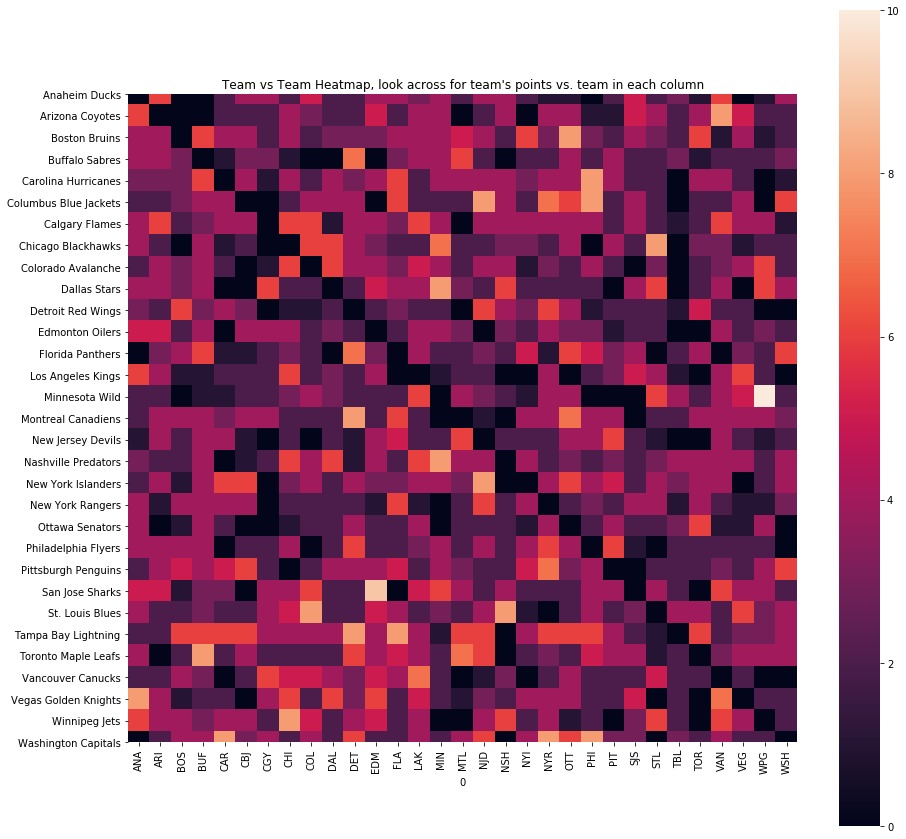

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.set_title("Team vs Team Heatmap, look across for team's points vs. team in each column")
sns.heatmap(df, square=True)
plt.show();